# Credit Risk Modeling (PD Model)

### - We create a logistic regression model to predict probability of default (PD) for a customer.
### - We also create a scorecard for calculating Credit Scores for the customers.

# 

## 1) Import Libraries and Dataset

In [100]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import seaborn as sns
sns.set_theme(style="white", palette='pastel')
%matplotlib inline
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')

In [101]:
df_backup = pd.read_csv('loan_data_2007_2014.csv')

In [102]:
df = df_backup.iloc[:,1:].copy()

In [103]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.00,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.00,Jan-85,1.00,nan,nan,3.00,0.00,13648,83.70,9.00,f,0.00,0.00,5861.07,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.00,Apr-99,5.00,nan,nan,3.00,0.00,1687,9.40,4.00,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.00,Nov-01,2.00,nan,nan,2.00,0.00,2956,98.50,10.00,f,0.00,0.00,3003.65,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [104]:
#sorted(df.columns.values)

In [105]:
del_columns = 'all_util, annual_inc_joint, application_type, collection_recovery_fee, collections_12_mths_ex_med, desc, '\
             +'dti_joint, emp_title, funded_amnt_inv, id, il_util, inq_fi, inq_last_12m, last_credit_pull_d, last_pymnt_amnt, '\
             +'last_pymnt_d, loan_amnt, max_bal_bc, member_id, mths_since_last_delinq, mths_since_last_major_derog, '\
             +'mths_since_last_record, mths_since_rcnt_il, next_pymnt_d, open_acc_6m, open_il_12m, open_il_24m, open_il_6m, '\
             +'open_rv_12m, open_rv_24m, out_prncp_inv, policy_code, recoveries, revol_bal, revol_util, title, tot_coll_amt, '\
             +'tot_cur_bal, total_bal_il, total_cu_tl, total_pymnt_inv, total_rec_late_fee, url, verification_status_joint, '\
             +'zip_code, sub_grade, total_rev_hi_lim'

In [106]:
df.drop(del_columns.split(', '), axis=1, inplace=True)
df.head(3)

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,acc_now_delinq
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0.00,Jan-85,1.00,3.00,0.00,9.00,f,0.00,5861.07,5000.00,861.07,0.00
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0.00,Apr-99,5.00,3.00,0.00,4.00,f,0.00,1008.71,456.46,435.17,0.00
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0.00,Nov-01,2.00,2.00,0.00,10.00,f,0.00,3003.65,2400.00,603.65,0.00


In [107]:
#df.info()

# 

## 2) Data cleaning

### 2.a. Change type from object to numeric for following columns:<br><br>term, emp_length, earliest_cr_line, issue_date

In [108]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [109]:
df['term_int'] = df['term'].str[1:3]
df['term_int'] = pd.to_numeric(df['term_int'])
df['term_int'].unique()

array([36, 60], dtype=int64)

In [110]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [111]:
df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year', str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace('n/a', str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace(' years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace(' year', '')
df['emp_length_int'] = pd.to_numeric(df['emp_length_int'])
df['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [112]:
df['earliest_cr_line'].head(3).unique()

array(['Jan-85', 'Apr-99', 'Nov-01'], dtype=object)

In [113]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
df['mths_since_earliest_cr_line'] = round((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date'])/np.timedelta64(1, 'M'))
df['mths_since_earliest_cr_line'].head(3).unique()

array([395., 224., 193.])

In [114]:
df['mths_since_earliest_cr_line'].describe().head(4)

count   466256.00
mean       239.48
std         93.97
min       -612.00
Name: mths_since_earliest_cr_line, dtype: float64

In [115]:
df['mths_since_earliest_cr_line'][df['mths_since_earliest_cr_line']<0] = df['mths_since_earliest_cr_line'].max()

In [116]:
min(df['mths_since_earliest_cr_line'])

73.0

In [117]:
df['issue_d'].unique()[:3]

array(['Dec-11', 'Nov-11', 'Oct-11'], dtype=object)

In [118]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
df['mths_since_issue_d'] = round((pd.to_datetime('2017-12-01') - df['issue_d_date'])/np.timedelta64(1, 'M'))
df['mths_since_issue_d'].unique()[:3]

array([72., 73., 74.])

In [119]:
df.drop(['term', 'emp_length', 'earliest_cr_line', 'earliest_cr_line_date', 'issue_d', 'issue_d_date'], axis=1, inplace=True)
df.head(3)

,funded_amnt,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,acc_now_delinq,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d
0,5000,10.65,162.87,B,RENT,24000.00,Verified,Fully Paid,n,credit_card,AZ,27.65,0.00,1.00,3.00,0.00,9.00,f,0.00,5861.07,5000.00,861.07,0.00,36,10.00,395.00,72.00
1,2500,15.27,59.83,C,RENT,30000.00,Source Verified,Charged Off,n,car,GA,1.00,0.00,5.00,3.00,0.00,4.00,f,0.00,1008.71,456.46,435.17,0.00,60,0.00,224.00,72.00
2,2400,15.96,84.33,C,RENT,12252.00,Not Verified,Fully Paid,n,small_business,IL,8.72,0.00,2.00,2.00,0.00,10.00,f,0.00,3003.65,2400.00,603.65,0.00,36,10.00,193.00,72.00


### 2.b. Fill columns with missing values:<br><br>i) Replace values with 0: emp_length_int, delinq_2yrs, mths_since_earliest_cr_line, inq_last_6mths, open_acc, pub_rec, total_acc, acc_now_delinq<br>ii) Replace values with funded amount: total_rev_hi_lim<br>iii) Replace values with the column average: annual_inc

In [120]:
df.isnull().sum().sum()

21215

In [121]:
df['emp_length_int'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)

In [122]:
df.isnull().sum().sum()

0

### 2.c. Create the target variable from loan status column

In [123]:
df['good_bad'] = np.where(df['loan_status'].isin(['Charged Off', 'Default',
                                                           'Does not meet the credit policy. Status:Charged Off',
                                                           'Late (31-120 days)']), 0, 1)
df.drop(['loan_status'], axis=1, inplace=True)
df.head(3)

,funded_amnt,int_rate,installment,grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,acc_now_delinq,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,good_bad
0,5000,10.65,162.87,B,RENT,24000.00,Verified,n,credit_card,AZ,27.65,0.00,1.00,3.00,0.00,9.00,f,0.00,5861.07,5000.00,861.07,0.00,36,10.00,395.00,72.00,1
1,2500,15.27,59.83,C,RENT,30000.00,Source Verified,n,car,GA,1.00,0.00,5.00,3.00,0.00,4.00,f,0.00,1008.71,456.46,435.17,0.00,60,0.00,224.00,72.00,0
2,2400,15.96,84.33,C,RENT,12252.00,Not Verified,n,small_business,IL,8.72,0.00,2.00,2.00,0.00,10.00,f,0.00,3003.65,2400.00,603.65,0.00,36,10.00,193.00,72.00,1


In [124]:
for col_name in df.nunique().sort_values().index.values:
    if df[col_name].nunique() <= 15:
        print('\n'+col_name+': ',df[col_name].unique())


good_bad:  [1 0]

term_int:  [36 60]

pymnt_plan:  ['n' 'y']

initial_list_status:  ['f' 'w']

verification_status:  ['Verified' 'Source Verified' 'Not Verified']

home_ownership:  ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

acc_now_delinq:  [0. 1. 2. 3. 5. 4.]

grade:  ['B' 'C' 'A' 'E' 'F' 'D' 'G']

emp_length_int:  [10.  0.  1.  3.  8.  9.  4.  5.  6.  2.  7.]

purpose:  ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']


# 

## 3) Correlation visualizations

### 3.a. Discrete columns

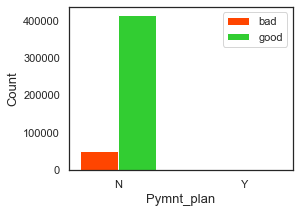

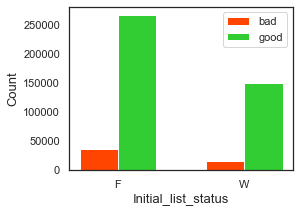

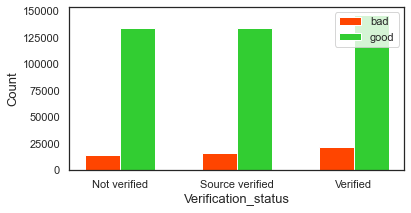

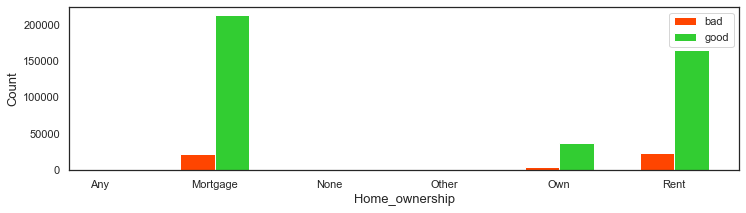

In [125]:
categorical_cols = ['pymnt_plan', 'initial_list_status', 'verification_status', 'home_ownership']
cap_label = np.vectorize(str.capitalize)
for col_name in categorical_cols:
    xtick_rot = 0
    plot_df = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad')
    x = cap_label(df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad').index.values)
    n_cat = len(x)
    bar_width = 0.3
    br1 = np.arange(n_cat)
    br2 = [x + bar_width for x in br1]
    y_bad = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad').iloc[:,0].values
    y_good = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad').iloc[:,1].values
    plt.figure(figsize=(2*n_cat,3))
    plt.bar(br1, y_bad, color='orangered', label='bad', width = bar_width) 
    plt.bar(br2, y_good, color ='limegreen', label='good', width = bar_width)
    plt.xlabel(str.capitalize(col_name), fontsize=13)
    plt.ylabel('Count', fontsize=13)
    plt.xticks([r + bar_width/2 for r in range(n_cat)], x, rotation=xtick_rot)
    plt.legend(loc='upper right')

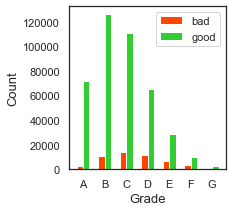

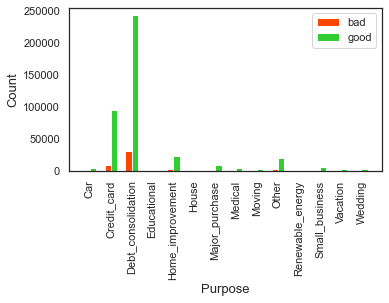

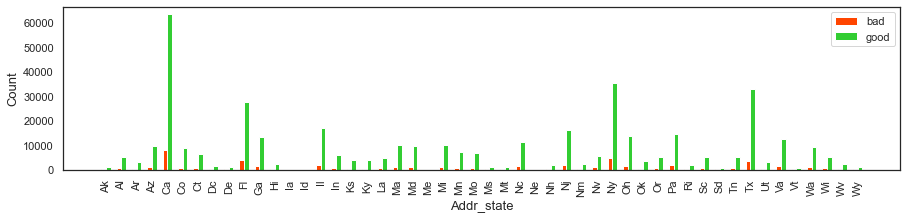

In [126]:
categorical_cols = ['grade', 'purpose', 'addr_state']
cap_label = np.vectorize(str.capitalize)
for col_name in categorical_cols:
    xtick_rot = 0
    if col_name in ['purpose', 'addr_state']:
        xtick_rot = 90
    plot_df = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad')
    x = cap_label(df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad').index.values)
    n_cat = len(x)
    bar_width = 0.3
    br1 = np.arange(n_cat)
    br2 = [x + bar_width for x in br1]
    y_bad = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad').iloc[:,0].values
    y_good = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad').iloc[:,1].values
    if col_name == 'addr_state':
        plt.figure(figsize=(15,3))
    else:
        plt.figure(figsize=(n_cat/2.5,3))
    plt.bar(br1, y_bad, color='orangered', label='bad', width = bar_width) 
    plt.bar(br2, y_good, color ='limegreen', label='good', width = bar_width)
    plt.xlabel(str.capitalize(col_name), fontsize=13)
    plt.ylabel('Count', fontsize=13)
    plt.xticks([r + bar_width/2 for r in range(n_cat)], x, rotation=xtick_rot)
    plt.legend(loc='upper right')

### 3.b. Continuous columns

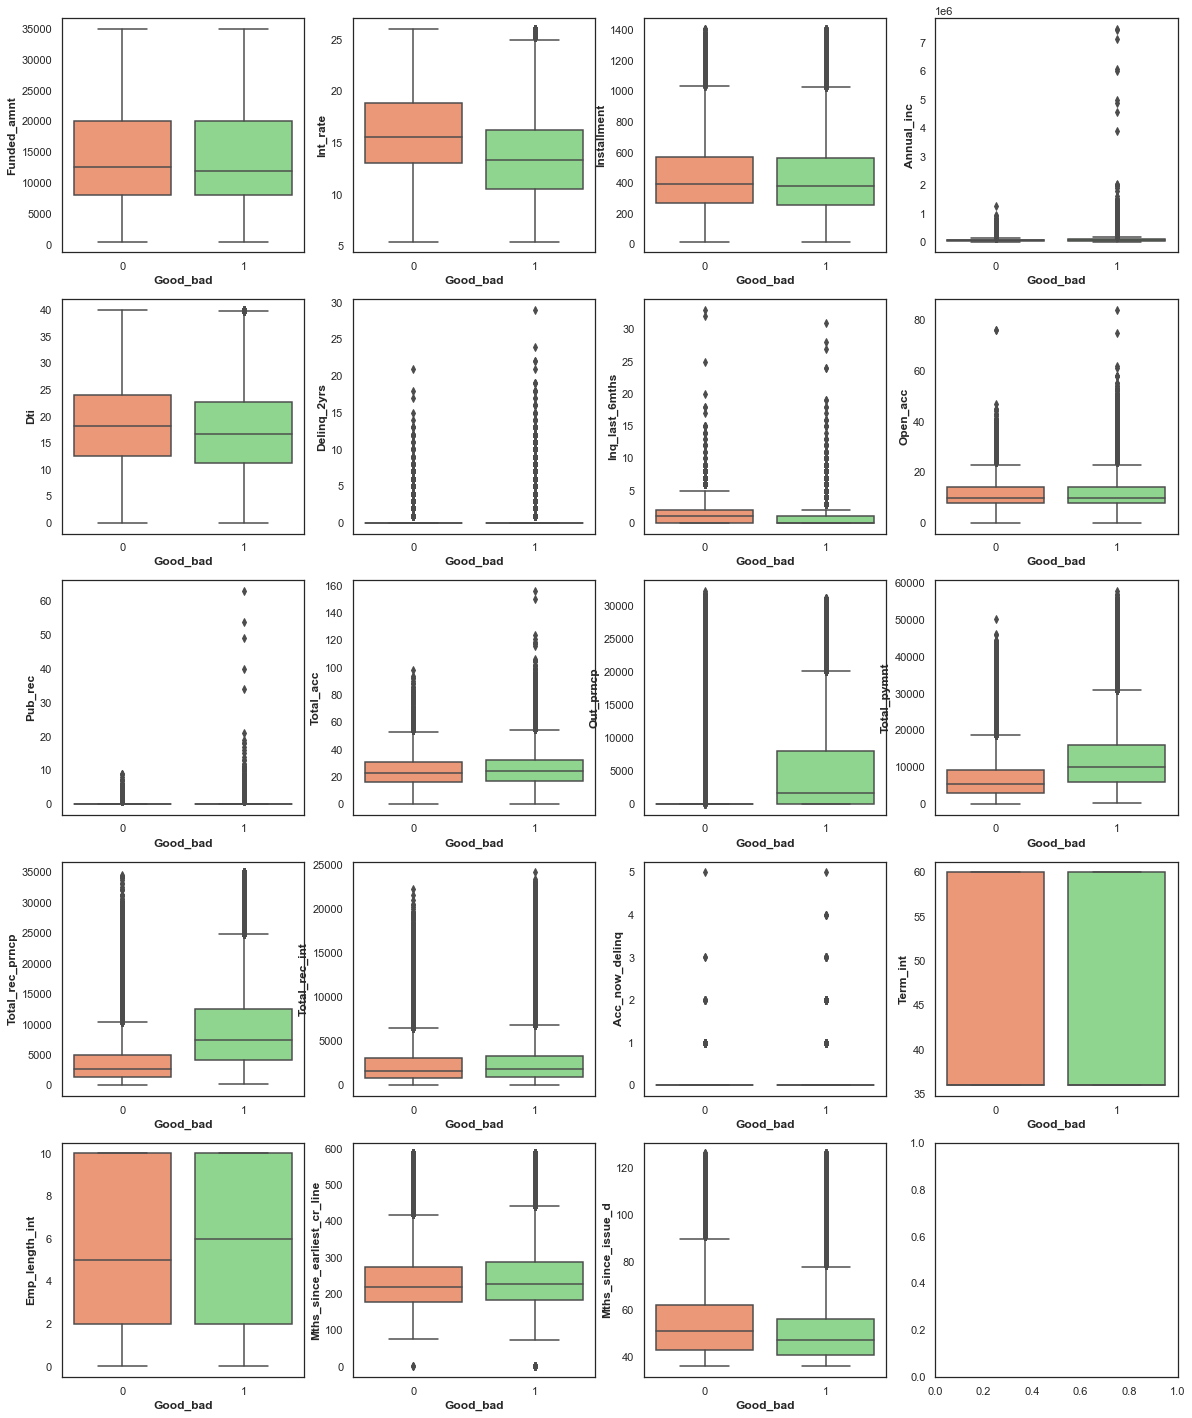

In [127]:
numerical_cols = ['funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
                  'open_acc', 'pub_rec', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 
                  'acc_now_delinq', 'term_int', 'emp_length_int', 'mths_since_earliest_cr_line', 
                  'mths_since_issue_d']
fig, axes = plt.subplots(5, 4, figsize=(20,25))
k = -1
for i in range(5):
    for j in range(4):
        k = k + 1
        try:
            col_name = numerical_cols[k]
            ax = sns.boxplot(ax=axes[i, j], data=df, x='good_bad', y=col_name, palette=['orangered', 'limegreen'])
            for patch in ax.artists:
                r, g, b, a = patch.get_facecolor()
                patch.set_facecolor((r, g, b, 0.6))
            ax.set_xlabel('Good_bad', weight='bold')
            ax.set_ylabel(str.capitalize(col_name), weight='bold')
        except:
            pass

# 

## 4) Fine and Coarse Classing using Weight of Evidence (WoE)

In [128]:
def get_woe_matrix(df, col_name, discrete=True):
    woe_mat = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad')
    woe_mat[0].fillna(0, inplace=True)
    woe_mat[1].fillna(0, inplace=True)
    woe_mat.iloc[:,[0,1]].fillna(0)
    woe_mat['pct_good'] = woe_mat[1]/woe_mat[1].sum()
    woe_mat['pct_bad'] = woe_mat[0]/woe_mat[0].sum()
    woe_mat['num_obs'] = woe_mat[0]+woe_mat[1]
    woe_value = np.log(woe_mat['pct_good']/woe_mat['pct_bad'])
    woe_mat['woe'] = np.where(np.isinf(woe_value), np.nan,
                     np.where(np.isinf(-woe_value), np.nan, woe_value))         
    woe_mat['pct_obs'] = (woe_mat[0]+woe_mat[1])/(woe_mat[0].sum()+woe_mat[1].sum())*100
    woe_mat['info_val'] = ((woe_mat['pct_good']-woe_mat['pct_bad'])*woe_mat['woe']).sum()
    woe_mat = woe_mat.sort_values(by='woe')
    return woe_mat

def plot_woe(woe_mat, col_name, plot_text=True, xtick_rot=0, font_size=9, indices=None):
    if indices:
        ind1, ind2 = indices
        if ind1 is None:
            woe_mat = woe_mat.iloc[:ind2]
        elif ind2 is None:
            woe_mat = woe_mat.iloc[ind1:]
        else:
            woe_mat = woe_mat.iloc[ind1:ind2]
    x = woe_mat.index.values
    y = woe_mat['woe']
    n_cat = len(x)
    plt.figure(figsize=(15,3))
    plt.plot(x, y, 'bo--')
    plt.xlabel(col_name.capitalize())
    plt.ylabel('Weight of Evidence (WoE)')
    plt.title('Weight of Evidence for \''+col_name+'\' column', fontsize=14, weight='bold')
    y_min, y_max = plt.ylim()
    plt.ylim(y_min-(y_max-y_min)*0.1, y_max+(y_max-y_min)*0.1)
    plt.xticks(rotation=xtick_rot)
    if plot_text:
        for index in range(len(x)):
            if y[index] >= 0:
                plt.text(x[index], y[index], round(y[index],3), ha='center', va='bottom', color='green', fontsize=font_size, weight='bold')
                plt.text(x[index], y[index], str(round(woe_mat['pct_obs'][index],1))+'%', ha='center', va='top', color='blue', fontsize=font_size)
            else:
                plt.text(x[index], y[index], round(y[index],3), ha='center', va='bottom', color='red', fontsize=font_size, weight='bold')
                plt.text(x[index], y[index], str(round(woe_mat['pct_obs'][index],1))+'%', ha='center', va='top', color='blue', fontsize=font_size)
    return

In [129]:
woe = get_woe_matrix(df, 'purpose')
woe

good_bad,0,1,pct_good,pct_bad,num_obs,woe,pct_obs,info_val
purpose,,,,,,,,
small_business,1513,5500,0.01,0.03,7013,-0.81,1.50,0.04
educational,88,334,0.00,0.00,422,-0.76,0.09,0.04
renewable_energy,54,297,0.00,0.00,351,-0.39,0.08,0.04
moving,457,2537,0.01,0.01,2994,-0.38,0.64,0.04
house,318,1951,0.00,0.01,2269,-0.28,0.49,0.04
other,3269,20421,0.05,0.06,23690,-0.27,5.08,0.04
medical,616,3986,0.01,0.01,4602,-0.23,0.99,0.04
wedding,285,2058,0.00,0.01,2343,-0.12,0.50,0.04
vacation,293,2194,0.01,0.01,2487,-0.08,0.53,0.04


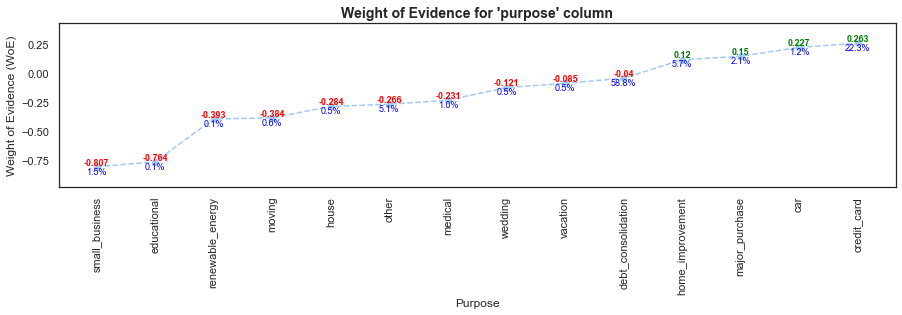

In [130]:
plot_woe(woe, 'purpose', xtick_rot=90)

## - We can see that:<br>1. small_business and educational loans have similar WoE,<br>2. renewable_energy, moving, house, and other loans have similar WoE, and so on.
## We hence create the classes by grouping the similar categories.

In [131]:
direct_dummies = ['term_int', 'pymnt_plan', 'initial_list_status', 'verification_status',
                  'acc_now_delinq', 'grade', 'emp_length_int']

In [132]:
for col_name in direct_dummies:
    for unique_val in sorted(df[col_name].unique()):
        df[col_name+' : '+str(unique_val)] = (df[col_name]==unique_val).astype(int)
df.head(3)

,funded_amnt,int_rate,installment,grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,acc_now_delinq,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,good_bad,term_int : 36,term_int : 60,pymnt_plan : n,pymnt_plan : y,initial_list_status : f,initial_list_status : w,verification_status : Not Verified,verification_status : Source Verified,verification_status : Verified,acc_now_delinq : 0.0,acc_now_delinq : 1.0,acc_now_delinq : 2.0,acc_now_delinq : 3.0,acc_now_delinq : 4.0,acc_now_delinq : 5.0,grade : A,grade : B,grade : C,grade : D,grade : E,grade : F,grade : G,emp_length_int : 0.0,emp_length_int : 1.0,emp_length_int : 2.0,emp_length_int : 3.0,emp_length_int : 4.0,emp_length_int : 5.0,emp_length_int : 6.0,emp_length_int : 7.0,emp_length_int : 8.0,emp_length_int : 9.0,emp_length_int : 10.0
0,5000,10.65,162.87,B,RENT,24000.00,Verified,n,credit_card,AZ,27.65,0.00,1.00,3.00,0.00,9.00,f,0.00,5861.07,5000.00,861.07,0.00,36,10.00,395.00,72.00,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2500,15.27,59.83,C,RENT,30000.00,Source Verified,n,car,GA,1.00,0.00,5.00,3.00,0.00,4.00,f,0.00,1008.71,456.46,435.17,0.00,60,0.00,224.00,72.00,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2400,15.96,84.33,C,RENT,12252.00,Not Verified,n,small_business,IL,8.72,0.00,2.00,2.00,0.00,10.00,f,0.00,3003.65,2400.00,603.65,0.00,36,10.00,193.00,72.00,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [133]:
grouped_dummies = ['home_ownership', 'purpose', 'addr_state']

In [134]:
home_ownership__classes = ' other none rent; own; mortgage any'
purpose__classes = ' small_business educational; renewable_energy moving house other; '\
                  +'medical wedding vacation debt_consolidation; home_improvement major_purchase car credit_card'
addr_state__classes = ' NE IA NV; HI FL AL; NY LA; NM OK NC MO MD NJ VA; CA; AZ MI UT TN AR; PA RI; OH KY DE MN SD MA IN; '\
                     +'GA WA VM OR; TX; IL CT MT; CO SC; KS VT AK MS ID NH; WV WY DC ME'

for group_label in home_ownership__classes.split(';'):
    df['home_ownership : '+group_label[1:]] = df['home_ownership'].isin(group_label.split(' ')[1:]).astype(int)

for group_label in purpose__classes.split(';'):
    df['purpose : '+group_label[1:]] = df['purpose'].isin(group_label.split(' ')[1:]).astype(int)

for group_label in addr_state__classes.split(';'):
    df['addr_state : '+group_label[1:]] = df['addr_state'].isin(group_label.split(' ')[1:]).astype(int)

df.head(3)

,funded_amnt,int_rate,installment,grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,acc_now_delinq,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,good_bad,term_int : 36,term_int : 60,pymnt_plan : n,pymnt_plan : y,initial_list_status : f,initial_list_status : w,verification_status : Not Verified,verification_status : Source Verified,verification_status : Verified,acc_now_delinq : 0.0,acc_now_delinq : 1.0,acc_now_delinq : 2.0,acc_now_delinq : 3.0,acc_now_delinq : 4.0,acc_now_delinq : 5.0,grade : A,grade : B,grade : C,grade : D,grade : E,grade : F,grade : G,emp_length_int : 0.0,emp_length_int : 1.0,emp_length_int : 2.0,emp_length_int : 3.0,emp_length_int : 4.0,emp_length_int : 5.0,emp_length_int : 6.0,emp_length_int : 7.0,emp_length_int : 8.0,emp_length_int : 9.0,emp_length_int : 10.0,home_ownership : other none rent,home_ownership : own,home_ownership : mortgage any,purpose : small_business educational,purpose : renewable_energy moving house other,purpose : medical wedding vacation debt_consolidation,purpose : home_improvement major_purchase car credit_card,addr_state : NE IA NV,addr_state : HI FL AL,addr_state : NY LA,addr_state : NM OK NC MO MD NJ VA,addr_state : CA,addr_state : AZ MI UT TN AR,addr_state : PA RI,addr_state : OH KY DE MN SD MA IN,addr_state : GA WA VM OR,addr_state : TX,addr_state : IL CT MT,addr_state : CO SC,addr_state : KS VT AK MS ID NH,addr_state : WV WY DC ME
0,5000,10.65,162.87,B,RENT,24000.00,Verified,n,credit_card,AZ,27.65,0.00,1.00,3.00,0.00,9.00,f,0.00,5861.07,5000.00,861.07,0.00,36,10.00,395.00,72.00,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2500,15.27,59.83,C,RENT,30000.00,Source Verified,n,car,GA,1.00,0.00,5.00,3.00,0.00,4.00,f,0.00,1008.71,456.46,435.17,0.00,60,0.00,224.00,72.00,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2400,15.96,84.33,C,RENT,12252.00,Not Verified,n,small_business,IL,8.72,0.00,2.00,2.00,0.00,10.00,f,0.00,3003.65,2400.00,603.65,0.00,36,10.00,193.00,72.00,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [135]:
ranged_dummies = ['funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
                  'pub_rec', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
                  'mths_since_earliest_cr_line', 'mths_since_issue_d']

In [136]:
def bins_to_iv(df, col_name, num_bins=10):
    temp_df = df[[col_name, 'good_bad']].copy()
    temp_df[col_name+'~'] = None
    col_min, col_max = (temp_df[col_name].min(), temp_df[col_name].max())
    div = (col_max-col_min)*1.0/num_bins
    for i in range(num_bins):
        left, right = (round(col_min+i*div,2), round(col_min+(i+1)*div,2))
        label = '0'*(2-len(str(i)))+str(i)+' : '+str(left)+'-'+str(right)
        indices = (temp_df[col_name].between(left, right, inclusive='left') == True)
        temp_df.loc[indices, col_name+'~'] = label
    return temp_df

In [137]:
df_dummies = []
for col_name in ranged_dummies:
    binned = bins_to_iv(df, col_name)
    dummies = pd.get_dummies(binned[col_name+'~'], prefix=col_name+' : ', prefix_sep='')
    df_dummies.append(dummies)
df_dummies = pd.concat(df_dummies, axis=1)
df = pd.concat([df, df_dummies], axis=1)
df.head(3)

,funded_amnt,int_rate,installment,grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,acc_now_delinq,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,good_bad,term_int : 36,term_int : 60,pymnt_plan : n,pymnt_plan : y,initial_list_status : f,initial_list_status : w,verification_status : Not Verified,verification_status : Source Verified,verification_status : Verified,acc_now_delinq : 0.0,acc_now_delinq : 1.0,acc_now_delinq : 2.0,acc_now_delinq : 3.0,acc_now_delinq : 4.0,acc_now_delinq : 5.0,grade : A,grade : B,grade : C,grade : D,grade : E,grade : F,grade : G,emp_length_int : 0.0,emp_length_int : 1.0,emp_length_int : 2.0,emp_length_int : 3.0,emp_length_int : 4.0,emp_length_int : 5.0,emp_length_int : 6.0,emp_length_int : 7.0,emp_length_int : 8.0,emp_length_int : 9.0,emp_length_int : 10.0,home_ownership : other none rent,home_ownership : own,home_ownership : mortgage any,purpose : small_business educational,purpose : renewable_energy moving house other,purpose : medical wedding vacation debt_consolidation,purpose : home_improvement major_purchase car credit_card,addr_state : NE IA NV,addr_state : HI FL AL,addr_state : NY LA,addr_state : NM OK NC MO MD NJ VA,addr_state : CA,addr_state : AZ MI UT TN AR,addr_state : PA RI,addr_state : OH KY DE MN SD MA IN,addr_state : GA WA VM OR,addr_state : TX,addr_state : IL CT MT,addr_state : CO SC,addr_state : KS VT AK MS ID NH,addr_state : WV WY DC ME,funded_amnt : 00 : 500.0-3950.0,funded_amnt : 01 : 3950.0-7400.0,funded_amnt : 02 : 7400.0-10850.0,funded_amnt : 03 : 10850.0-14300.0,funded_amnt : 04 : 14300.0-17750.0,funded_amnt : 05 : 17750.0-21200.0,funded_amnt : 06 : 21200.0-24650.0,funded_amnt : 07 : 24650.0-28100.0,funded_amnt : 08 : 28100.0-31550.0,funded_amnt : 09 : 31550.0-35000.0,int_rate : 00 : 5.42-7.48,int_rate : 01 : 7.48-9.55,int_rate : 02 : 9.55-11.61,int_rate : 03 : 11.61-13.68,int_rate : 04 : 13.68-15.74,int_rate : 05 : 15.74-17.8,int_rate : 06 : 17.8-19.87,int_rate : 07 : 19.87-21.93,int_rate : 08 : 21.93-24.0,int_rate : 09 : 24.0-26.06,installment : 00 : 15.67-155.1,installment : 01 : 155.1-294.53,installment : 02 : 294.53-433.97,installment : 03 : 433.97-573.4,installment : 04 : 573.4-712.83,installment : 05 : 712.83-852.26,installment : 06 : 852.26-991.69,installment : 07 : 991.69-1131.13,installment : 08 : 1131.13-1270.56,installment : 09 : 1270.56-1409.99,annual_inc : 00 : 1896.0-751706.4,annual_inc : 01 : 751706.4-1501516.8,annual_inc : 02 : 1501516.8-2251327.2,annual_inc : 05 : 3750948.0-4500758.4,annual_inc : 06 : 4500758.4-5250568.8,annual_inc : 07 : 5250568.8-6000379.2,annual_inc : 08 : 6000379.2-6750189.6,annual_inc : 09 : 6750189.6-7500000.0,dti : 00 : 0.0-4.0,dti : 01 : 4.0-8.0,dti : 02 : 8.0-12.0,dti : 03 : 12.0-16.0,dti : 04 : 16.0-20.0,dti : 05 : 20.0-23.99,dti : 06 : 23.99-27.99,dti : 07 : 27.99-31.99,dti : 08 : 31.99-35.99,dti : 09 : 35.99-39.99,delinq_2yrs : 00 : 0.0-2.9,delinq_2yrs : 01 : 2.9-5.8,delinq_2yrs : 02 : 5.8-8.7,delinq_2yrs : 03 : 8.7-11.6,delinq_2yrs : 04 : 11.6-14.5,delinq_2yrs : 05 : 14.5-17.4,delinq_2yrs : 06 : 17.4-20.3,delinq_2yrs : 07 : 20.3-23.2,delinq_2yrs : 08 : 23.2-26.1,delinq_2yrs : 09 : 26.1-29.0,inq_last_6mths : 00 : 0.0-3.3,inq_last_6mths : 01 : 3.3-6.6,inq_last_6mths : 02 : 6.6-9.9,inq_last_6mths : 03 : 9.9-13.2,inq_last_6mths : 04 : 13.2-16.5,inq_last_6mths : 05 : 16.5-19.8,inq_last_6mths : 06 : 19.8-23.1,inq_last_6mths : 07 : 23.1-26.4,inq_last_6mths : 08 : 26.4-29.7,inq_last_6mths : 09 : 29.7-33.0,open_acc : 00 : 0.0-8.4,open_acc : 01 : 8.4-16.8,open_acc : 02 : 16.8-25.2,open_acc : 03 : 25.2-33.6,open_acc : 04 : 33.6-42.0,open_acc : 05 : 42.0-50.4,open_acc : 06 : 50.4-58.8,open_acc : 07 : 58.8-67.2,open_acc : 08 : 67.2-75.6,open_acc : 09 : 75.6-84.0,pub_rec : 00 : 0.0-6.3,pub_rec : 01 : 6.3-12.6,pub_rec : 02 : 12.6-18.9,pub_rec : 03 : 18.9-25.2,pu

In [138]:
df.drop(direct_dummies+grouped_dummies+ranged_dummies, axis=1, inplace=True)
df.head(3)

,good_bad,term_int : 36,term_int : 60,pymnt_plan : n,pymnt_plan : y,initial_list_status : f,initial_list_status : w,verification_status : Not Verified,verification_status : Source Verified,verification_status : Verified,acc_now_delinq : 0.0,acc_now_delinq : 1.0,acc_now_delinq : 2.0,acc_now_delinq : 3.0,acc_now_delinq : 4.0,acc_now_delinq : 5.0,grade : A,grade : B,grade : C,grade : D,grade : E,grade : F,grade : G,emp_length_int : 0.0,emp_length_int : 1.0,emp_length_int : 2.0,emp_length_int : 3.0,emp_length_int : 4.0,emp_length_int : 5.0,emp_length_int : 6.0,emp_length_int : 7.0,emp_length_int : 8.0,emp_length_int : 9.0,emp_length_int : 10.0,home_ownership : other none rent,home_ownership : own,home_ownership : mortgage any,purpose : small_business educational,purpose : renewable_energy moving house other,purpose : medical wedding vacation debt_consolidation,purpose : home_improvement major_purchase car credit_card,addr_state : NE IA NV,addr_state : HI FL AL,addr_state : NY LA,addr_state : NM OK NC MO MD NJ VA,addr_state : CA,addr_state : AZ MI UT TN AR,addr_state : PA RI,addr_state : OH KY DE MN SD MA IN,addr_state : GA WA VM OR,addr_state : TX,addr_state : IL CT MT,addr_state : CO SC,addr_state : KS VT AK MS ID NH,addr_state : WV WY DC ME,funded_amnt : 00 : 500.0-3950.0,funded_amnt : 01 : 3950.0-7400.0,funded_amnt : 02 : 7400.0-10850.0,funded_amnt : 03 : 10850.0-14300.0,funded_amnt : 04 : 14300.0-17750.0,funded_amnt : 05 : 17750.0-21200.0,funded_amnt : 06 : 21200.0-24650.0,funded_amnt : 07 : 24650.0-28100.0,funded_amnt : 08 : 28100.0-31550.0,funded_amnt : 09 : 31550.0-35000.0,int_rate : 00 : 5.42-7.48,int_rate : 01 : 7.48-9.55,int_rate : 02 : 9.55-11.61,int_rate : 03 : 11.61-13.68,int_rate : 04 : 13.68-15.74,int_rate : 05 : 15.74-17.8,int_rate : 06 : 17.8-19.87,int_rate : 07 : 19.87-21.93,int_rate : 08 : 21.93-24.0,int_rate : 09 : 24.0-26.06,installment : 00 : 15.67-155.1,installment : 01 : 155.1-294.53,installment : 02 : 294.53-433.97,installment : 03 : 433.97-573.4,installment : 04 : 573.4-712.83,installment : 05 : 712.83-852.26,installment : 06 : 852.26-991.69,installment : 07 : 991.69-1131.13,installment : 08 : 1131.13-1270.56,installment : 09 : 1270.56-1409.99,annual_inc : 00 : 1896.0-751706.4,annual_inc : 01 : 751706.4-1501516.8,annual_inc : 02 : 1501516.8-2251327.2,annual_inc : 05 : 3750948.0-4500758.4,annual_inc : 06 : 4500758.4-5250568.8,annual_inc : 07 : 5250568.8-6000379.2,annual_inc : 08 : 6000379.2-6750189.6,annual_inc : 09 : 6750189.6-7500000.0,dti : 00 : 0.0-4.0,dti : 01 : 4.0-8.0,dti : 02 : 8.0-12.0,dti : 03 : 12.0-16.0,dti : 04 : 16.0-20.0,dti : 05 : 20.0-23.99,dti : 06 : 23.99-27.99,dti : 07 : 27.99-31.99,dti : 08 : 31.99-35.99,dti : 09 : 35.99-39.99,delinq_2yrs : 00 : 0.0-2.9,delinq_2yrs : 01 : 2.9-5.8,delinq_2yrs : 02 : 5.8-8.7,delinq_2yrs : 03 : 8.7-11.6,delinq_2yrs : 04 : 11.6-14.5,delinq_2yrs : 05 : 14.5-17.4,delinq_2yrs : 06 : 17.4-20.3,delinq_2yrs : 07 : 20.3-23.2,delinq_2yrs : 08 : 23.2-26.1,delinq_2yrs : 09 : 26.1-29.0,inq_last_6mths : 00 : 0.0-3.3,inq_last_6mths : 01 : 3.3-6.6,inq_last_6mths : 02 : 6.6-9.9,inq_last_6mths : 03 : 9.9-13.2,inq_last_6mths : 04 : 13.2-16.5,inq_last_6mths : 05 : 16.5-19.8,inq_last_6mths : 06 : 19.8-23.1,inq_last_6mths : 07 : 23.1-26.4,inq_last_6mths : 08 : 26.4-29.7,inq_last_6mths : 09 : 29.7-33.0,open_acc : 00 : 0.0-8.4,open_acc : 01 : 8.4-16.8,open_acc : 02 : 16.8-25.2,open_acc : 03 : 25.2-33.6,open_acc : 04 : 33.6-42.0,open_acc : 05 : 42.0-50.4,open_acc : 06 : 50.4-58.8,open_acc : 07 : 58.8-67.2,open_acc : 08 : 67.2-75.6,open_acc : 09 : 75.6-84.0,pub_rec : 00 : 0.0-6.3,pub_rec : 01 : 6.3-12.6,pub_rec : 02 : 12.6-18.9,pub_rec : 03 : 18.9-25.2,pub_rec : 05 : 31.5-37.8,pub_rec : 06 : 37.8-44.1,pub_rec : 07 : 44.1-50.4,pub_rec : 08 : 50.4-56.7,pub_rec : 09 : 56.7-63.0,total_acc : 00 : 0.0-15.6,total_acc : 01 : 15.6-31.2,total_acc : 02 : 31.2-46.8,total_acc : 03 : 46.8-62.4,total_acc : 04 : 62.4-78.0,total_acc : 05 : 78.0-93.6,total_acc : 06 : 93.6-109.2,total_acc : 07 : 10

In [139]:
ref_columns = 'term_int : 60, pymnt_plan : y, initial_list_status : f, verification_status : Verified, '+\
              'home_ownership : other none rent, acc_now_delinq : 5.0, grade : G, emp_length_int : 0.0, '+\
              'purpose : small_business educational, addr_state : NE IA NV, funded_amnt : 09 : 31550.0-35000.0, '+\
              'int_rate : 09 : 24.0-26.06, installment : 09 : 1270.56-1409.99, annual_inc : 00 : 1896.0-751706.4, '+\
              'dti : 09 : 35.99-39.99, delinq_2yrs : 09 : 26.1-29.0, inq_last_6mths : 09 : 29.7-33.0, '+\
              'open_acc : 09 : 75.6-84.0, pub_rec : 09 : 56.7-63.0, total_acc : 09 : 140.4-156.0, '+\
              'out_prncp : 09 : 28944.34-32160.38, total_pymnt : 00 : 0.0-5777.76, total_rec_prncp : 00 : 0.0-3500.0, '+\
              'total_rec_int : 00 : 0.0-2420.56, mths_since_earliest_cr_line : 00 : 0.0-58.7, '+\
              'mths_since_issue_d : 09 : 117.0-126.0'
ref_columns = ref_columns.split(', ')

In [140]:
df.drop(ref_columns, axis=1, inplace=True)
df.head(3)

,good_bad,term_int : 36,pymnt_plan : n,initial_list_status : w,verification_status : Not Verified,verification_status : Source Verified,acc_now_delinq : 0.0,acc_now_delinq : 1.0,acc_now_delinq : 2.0,acc_now_delinq : 3.0,acc_now_delinq : 4.0,grade : A,grade : B,grade : C,grade : D,grade : E,grade : F,emp_length_int : 1.0,emp_length_int : 2.0,emp_length_int : 3.0,emp_length_int : 4.0,emp_length_int : 5.0,emp_length_int : 6.0,emp_length_int : 7.0,emp_length_int : 8.0,emp_length_int : 9.0,emp_length_int : 10.0,home_ownership : own,home_ownership : mortgage any,purpose : renewable_energy moving house other,purpose : medical wedding vacation debt_consolidation,purpose : home_improvement major_purchase car credit_card,addr_state : HI FL AL,addr_state : NY LA,addr_state : NM OK NC MO MD NJ VA,addr_state : CA,addr_state : AZ MI UT TN AR,addr_state : PA RI,addr_state : OH KY DE MN SD MA IN,addr_state : GA WA VM OR,addr_state : TX,addr_state : IL CT MT,addr_state : CO SC,addr_state : KS VT AK MS ID NH,addr_state : WV WY DC ME,funded_amnt : 00 : 500.0-3950.0,funded_amnt : 01 : 3950.0-7400.0,funded_amnt : 02 : 7400.0-10850.0,funded_amnt : 03 : 10850.0-14300.0,funded_amnt : 04 : 14300.0-17750.0,funded_amnt : 05 : 17750.0-21200.0,funded_amnt : 06 : 21200.0-24650.0,funded_amnt : 07 : 24650.0-28100.0,funded_amnt : 08 : 28100.0-31550.0,int_rate : 00 : 5.42-7.48,int_rate : 01 : 7.48-9.55,int_rate : 02 : 9.55-11.61,int_rate : 03 : 11.61-13.68,int_rate : 04 : 13.68-15.74,int_rate : 05 : 15.74-17.8,int_rate : 06 : 17.8-19.87,int_rate : 07 : 19.87-21.93,int_rate : 08 : 21.93-24.0,installment : 00 : 15.67-155.1,installment : 01 : 155.1-294.53,installment : 02 : 294.53-433.97,installment : 03 : 433.97-573.4,installment : 04 : 573.4-712.83,installment : 05 : 712.83-852.26,installment : 06 : 852.26-991.69,installment : 07 : 991.69-1131.13,installment : 08 : 1131.13-1270.56,annual_inc : 01 : 751706.4-1501516.8,annual_inc : 02 : 1501516.8-2251327.2,annual_inc : 05 : 3750948.0-4500758.4,annual_inc : 06 : 4500758.4-5250568.8,annual_inc : 07 : 5250568.8-6000379.2,annual_inc : 08 : 6000379.2-6750189.6,annual_inc : 09 : 6750189.6-7500000.0,dti : 00 : 0.0-4.0,dti : 01 : 4.0-8.0,dti : 02 : 8.0-12.0,dti : 03 : 12.0-16.0,dti : 04 : 16.0-20.0,dti : 05 : 20.0-23.99,dti : 06 : 23.99-27.99,dti : 07 : 27.99-31.99,dti : 08 : 31.99-35.99,delinq_2yrs : 00 : 0.0-2.9,delinq_2yrs : 01 : 2.9-5.8,delinq_2yrs : 02 : 5.8-8.7,delinq_2yrs : 03 : 8.7-11.6,delinq_2yrs : 04 : 11.6-14.5,delinq_2yrs : 05 : 14.5-17.4,delinq_2yrs : 06 : 17.4-20.3,delinq_2yrs : 07 : 20.3-23.2,delinq_2yrs : 08 : 23.2-26.1,inq_last_6mths : 00 : 0.0-3.3,inq_last_6mths : 01 : 3.3-6.6,inq_last_6mths : 02 : 6.6-9.9,inq_last_6mths : 03 : 9.9-13.2,inq_last_6mths : 04 : 13.2-16.5,inq_last_6mths : 05 : 16.5-19.8,inq_last_6mths : 06 : 19.8-23.1,inq_last_6mths : 07 : 23.1-26.4,inq_last_6mths : 08 : 26.4-29.7,open_acc : 00 : 0.0-8.4,open_acc : 01 : 8.4-16.8,open_acc : 02 : 16.8-25.2,open_acc : 03 : 25.2-33.6,open_acc : 04 : 33.6-42.0,open_acc : 05 : 42.0-50.4,open_acc : 06 : 50.4-58.8,open_acc : 07 : 58.8-67.2,open_acc : 08 : 67.2-75.6,pub_rec : 00 : 0.0-6.3,pub_rec : 01 : 6.3-12.6,pub_rec : 02 : 12.6-18.9,pub_rec : 03 : 18.9-25.2,pub_rec : 05 : 31.5-37.8,pub_rec : 06 : 37.8-44.1,pub_rec : 07 : 44.1-50.4,pub_rec : 08 : 50.4-56.7,total_acc : 00 : 0.0-15.6,total_acc : 01 : 15.6-31.2,total_acc : 02 : 31.2-46.8,total_acc : 03 : 46.8-62.4,total_acc : 04 : 62.4-78.0,total_acc : 05 : 78.0-93.6,total_acc : 06 : 93.6-109.2,total_acc : 07 : 109.2-124.8,out_prncp : 00 : 0.0-3216.04,out_prncp : 01 : 3216.04-6432.08,out_prncp : 02 : 6432.08-9648.11,out_prncp : 03 : 9648.11-12864.15,out_prncp : 04 : 12864.15-16080.19,out_prncp : 05 : 16080.19-19296.23,out_prncp : 06 : 19296.23-22512.27,out_prncp : 07 : 22512.27-25728.3,out_prncp : 08 : 25728.3-28944.34,total_pymnt : 01 : 5777.76-11555.52,total_pymnt : 02 : 11555.52-17333.27,total_pymnt : 03 : 17333.27-23111.03,total_pymnt : 04 : 23111.03-28888.79,total_pymnt : 05 : 28888.79-34666.5

# 

## 5) Train-test split and Logistic Regression

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report

In [142]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [143]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

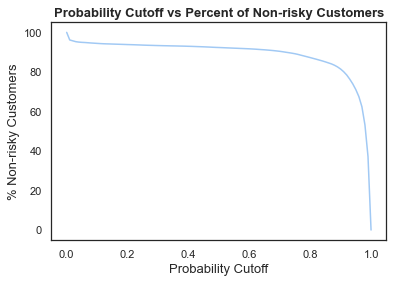

In [144]:
raw_pred = model.predict_proba(X_test)
non_defaulters = []
for cutoff in np.linspace(0, 100, 101)/100:
    non_defaulters.append(round(sum((raw_pred[:,1] >= cutoff).astype(int))/len(raw_pred)*100, 2))
plt.plot(np.linspace(0, 100, 101)/100, non_defaulters)
plt.title('Probability Cutoff vs Percent of Non-risky Customers', weight='bold', fontsize=13)
plt.xlabel('Probability Cutoff', fontsize=13)
plt.ylabel('% Non-risky Customers', fontsize=13);

In [145]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
feature_name = X_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(model.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', model.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table['Original name'] = summary_table['Feature name'].astype(str).str.split(' ').str[0]
summary_table.head(10)

,Feature name,Coefficients,Original name
0,Intercept,-8.2479,Intercept
1,term_int : 36,-0.4229,term_int
2,pymnt_plan : n,1.3484,pymnt_plan
3,initial_list_status : w,0.1006,initial_list_status
4,verification_status : Not Verified,0.1057,verification_status
5,verification_status : Source Verified,0.1091,verification_status
6,acc_now_delinq : 0.0,-0.3845,acc_now_delinq
7,acc_now_delinq : 1.0,-0.0628,acc_now_delinq
8,acc_now_delinq : 2.0,0.6828,acc_now_delinq
9,acc_now_delinq : 3.0,-0.0351,acc_now_delinq


In [146]:
min_score = 300
max_score = 900

In [147]:
scorecard = summary_table.copy()
scorecard.groupby('Original name').mean().head(5)

,Coefficients
Original name,
Intercept,-8.2479
acc_now_delinq,0.0537
addr_state,0.1649
annual_inc,0.0778
delinq_2yrs,-0.0471


In [148]:
min_sum_coef = scorecard.groupby('Original name')['Coefficients'].min().sum()
max_sum_coef = scorecard.groupby('Original name')['Coefficients'].max().sum()

In [149]:
scorecard['Score - Calculation'] = scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
scorecard['Score - Calculation'][0] = ((scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
scorecard['Score - Final'] = scorecard['Score - Calculation'].round()
scorecard.head(10)

,Feature name,Coefficients,Original name,Score - Calculation,Score - Final
0,Intercept,-8.2479,Intercept,415.0989,415.0000
1,term_int : 36,-0.4229,term_int,-4.0015,-4.0000
2,pymnt_plan : n,1.3484,pymnt_plan,12.7577,13.0000
3,initial_list_status : w,0.1006,initial_list_status,0.9521,1.0000
4,verification_status : Not Verified,0.1057,verification_status,0.9998,1.0000
5,verification_status : Source Verified,0.1091,verification_status,1.0325,1.0000
6,acc_now_delinq : 0.0,-0.3845,acc_now_delinq,-3.6379,-4.0000
7,acc_now_delinq : 1.0,-0.0628,acc_now_delinq,-0.5941,-1.0000
8,acc_now_delinq : 2.0,0.6828,acc_now_delinq,6.4602,6.0000
9,acc_now_delinq : 3.0,-0.0351,acc_now_delinq,-0.3317,-0.0000


In [150]:
customers = X_test.head(10).copy()
customers['Credit Score'] = None
customers['Customer ID'] = customers.index
customers.index = range(10)
for idx in customers.index:
    customers['Credit Score'][idx] = round(scorecard['Score - Final'][0] + np.dot(scorecard['Score - Final'][1:], customers.iloc[idx][:-2]))
customers[['Customer ID', 'Credit Score']]

,Customer ID,Credit Score
0,362514,594
1,288564,502
2,213591,522
3,263083,505
4,165001,539
5,82511,534
6,24671,544
7,97373,546
8,44058,548
9,351326,512


## 6) Credit Score and Probability of No-Default for a customer

In [151]:
customers['Probability of Default'] = None
for cust_num in range(10):
    customer = X_test.iloc[cust_num].values.reshape(1, -1).copy()
    PND = round(model.predict_proba(customer)[0][1]*100,2)
    customers['Probability of Default'].iloc[cust_num] = round(100-PND,2)
customers[['Customer ID', 'Credit Score', 'Probability of Default']]

,Customer ID,Credit Score,Probability of Default
0,362514,594,0.0000
1,288564,502,28.9900
2,213591,522,4.1300
3,263083,505,23.0800
4,165001,539,0.7100
5,82511,534,1.1700
6,24671,544,0.5100
7,97373,546,0.3800
8,44058,548,0.3200
9,351326,512,11.1200
